In [1]:
#Imports
from sklearn.datasets import make_circles
import numpy as np
import matplotlib.pyplot as plt


In [2]:
#Helper Functions

#Plot the data on a figure
def plot_data(p1, X, y):
    #Plot class where y==0
    p1.plot(X[y==0,0], X[y==0,1], 'ob', alpha=0.5)
    #Plot class where y==1
    p1.plot(X[y==1,0], X[y==1, 1], 'xr', alpha=0.5)
    p1.legend(['0','1'])
   
    return p1
    

In [3]:
#Common fundtion that draws the decision boundries
def plot_decision_boundry(model, X, y):
    
    amin, bmin = X.min(axis=0) - 0.1
    amax, bmax = X.max(axis=0) + 0.1
    
    hticks = np.linspace(amin, amax, 101)
    vticks = np.linspace(bmin, bmax, 101)
    
    aa, bb = np.meshgrid(hticks, vticks)
    ab = np.c_[aa.ravel(), bb.ravel()]

    #Make prediction with model and reshape the output so countourf can plot it
    c = model.predict(ab)
    Z = c.reshape(aa.shape)
    
    plt.figure(figsize=(12, 8))
    #Plot the contour
    plt.contourf(aa, bb, Z, cmap='bwr', alpha=0.2)
    #Plot the moons of data
    plot_data(plt, X, y)
    
    return plt

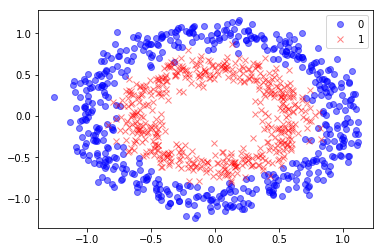

In [4]:
X, y = make_circles(n_samples=1000, factor=0.6, noise=0.1, random_state=42)
p1 = plot_data(plt, X, y)
p1.show()


In [5]:
#Split the data into training & test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [6]:
#Create Keras model
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

Using TensorFlow backend.


In [ ]:
#Simple sequential model
model = Sequential()
model.add(Dense(4, input_shape=(2,), activation="tanh", name="Hidden-1"))
model.add(Dense(4, activation="tanh", name="Hidden-2"))
#Add a Dense fully connected layer with 1 neuron. Using input_shape = (2,) says the input will be arrays of the form
#[*, 2]. The first dimension will be an unspecified number of batches (rows). The second dimension is 2 which are 
#the X, Y positions of each data element. The sigmoid activation function is used to return 0 or 1, signifying the 
#data cluster the position is predicted to belong to
model.add(Dense(1, activation="sigmoid"))
model.summary()

#Compile the model. Minimize crossentropy for a binary, Maximize for accuracy
model.compile(Adam(lr=0.05), 'binary_crossentropy', metrics=['accuracy'])

#from keras.utils import plot_model 
#plot_model(model, to_file="model.png", show_shapes=True, show_layer_names=True)

#Fit model with data from make_blobs. Make 100 cycles through the data training data. 
#Set verbose to 0 to supress progress messages
model.fit(X_train, y_train, epochs=100, verbose=0)

#Get loss & accuracy on the test data
eval_result = model.evaluate(X_test, y_test)

#Print test accuracy
print("\n\nTest Loss: ", eval_result[0], "Test Accuracy: ", eval_result[1])

#Plot the decision boundry
plot_decision_boundry(model, X, y).show()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Hidden-1 (Dense)             (None, 4)                 12        
_________________________________________________________________
Hidden-2 (Dense)             (None, 4)                 20        
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 5         
Total params: 37
Trainable params: 37
Non-trainable params: 0
_________________________________________________________________
Instructions for updating:
Use tf.cast instead.
